In [1]:
# Import all necessary libraries.
import numpy as np
from scipy.special import erfc
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
# Number of QPSK symbols to be transmitted.
N = 1000000

In [3]:
# Instantiate a Gaussian naive Bayes classifier for each one of the parts of a QPSK symbol.
gnb_re = GaussianNB()
gnb_im = GaussianNB()

In [4]:
# Create Es/N0 vector.

EsN0dB = np.arange(-2,22,2)
ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))

for idx in range(0,len(EsN0dB)):
    print('Es/N0 dB:', EsN0dB[idx])
    EsN0Lin = 10.0**(-(EsN0dB[idx]/10.0))

    # Generate N QPSK symbols.
    ip =(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0) + 1j*(2.0 * (np.random.rand(N, 1) >= 0.5) - 1.0)

    # Normalization of energy to 1.
    s = (1/np.sqrt(2))*ip;
    
    # Generate noise vector with unitary variance.
    noise = np.sqrt(1.0/2.0)*(np.random.randn(N, 1) + 1j*np.random.randn(N, 1))

    # Pass symbols through AWGN channel.
    y = s + np.sqrt(EsN0Lin)*noise

    # Fit model for real part.
    gnb_re.fit(y.real, ip.real.ravel())

    # Fit model for imaginary parts.
    gnb_im.fit(y.imag, ip.imag.ravel())

    # Prediction for real part.
    detected_ip_re = gnb_re.predict(y.real).reshape(N, 1)

    # Prediction for imaginary part.
    detected_ip_im = gnb_im.predict(y.imag).reshape(N, 1)
    
    # Simulated QPSK BER.
    error_re = (ip.real != detected_ip_re)
    error_im = (ip.imag != detected_ip_im)
    error = 0;
    for i in range(0, N):
        if(error_re[i]==True or error_im[i]==True):
            error = error + 1
            
    ser_simu[idx] = 1.0 * error / N
    
    # Theoretical BPSK BER.
    ser_theo[idx] = erfc( np.sqrt( 0.5*(10.0**(EsN0dB[idx]/10.0)) ) ) - (1/4)*(erfc(np.sqrt(0.5*(10.0**(EsN0dB[idx]/10.0)))))**2.0

Es/N0 dB: -2
Es/N0 dB: 0
Es/N0 dB: 2
Es/N0 dB: 4
Es/N0 dB: 6
Es/N0 dB: 8
Es/N0 dB: 10
Es/N0 dB: 12
Es/N0 dB: 14
Es/N0 dB: 16
Es/N0 dB: 18
Es/N0 dB: 20


In [5]:
# Print Es/N0 versus BER values.
for i in range(0,len(ser_simu)): print('Es/N0:%d \t- SER: %e' % (EsN0dB[i], ser_simu[i]))

Es/N0:-2 	- SER: 3.821970e-01
Es/N0:0 	- SER: 2.923270e-01
Es/N0:2 	- SER: 1.974570e-01
Es/N0:4 	- SER: 1.094490e-01
Es/N0:6 	- SER: 4.550600e-02
Es/N0:8 	- SER: 1.189700e-02
Es/N0:10 	- SER: 1.605000e-03
Es/N0:12 	- SER: 8.200000e-05
Es/N0:14 	- SER: 1.000000e-06
Es/N0:16 	- SER: 0.000000e+00
Es/N0:18 	- SER: 0.000000e+00
Es/N0:20 	- SER: 0.000000e+00


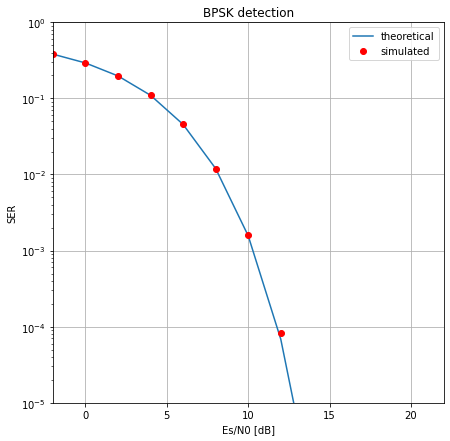

In [6]:
# Plot Es/N0 versus BER values.
fig = plt.figure(figsize=(7,7))
plt.plot(EsN0dB, ser_theo, label='theoretical')
plt.plot(EsN0dB, ser_simu, 'ro', label='simulated')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Es/N0 [dB]')
plt.ylabel('SER')
plt.grid(True)
plt.title('BPSK detection')
plt.legend()
plt.xlim([-2, 22])
plt.ylim([1e-5, 1])
plt.show()